# 1. Import and Install Dependencies 

In [5]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [6]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [7]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [8]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image,results

In [9]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right

In [10]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=1, circle_radius=1))# Draw pose connections
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=1)) # Draw left hand connections
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=1)) # Draw right

In [13]:
cap = cv2.VideoCapture(0)

#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        # Read feed
        ret,frame=cap.read()
        
        # Make detections
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        
        #draw landmarks
        draw_styled_landmarks(image,results)
        
        # show to screen
        cv2.imshow('OpneCV feed',image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [15]:
results

mediapipe.python.solution_base.SolutionOutputs

In [16]:
frame

array([[[ 85, 112, 133],
        [ 82, 110, 131],
        [ 79, 107, 128],
        ...,
        [138, 128, 141],
        [138, 128, 141],
        [138, 128, 142]],

       [[ 83, 109, 130],
        [ 81, 107, 128],
        [ 79, 105, 126],
        ...,
        [139, 129, 141],
        [139, 129, 142],
        [138, 128, 142]],

       [[ 85, 105, 126],
        [ 84, 104, 125],
        [ 82, 102, 123],
        ...,
        [140, 130, 140],
        [139, 129, 141],
        [138, 128, 141]],

       ...,

       [[ 39,  58,  76],
        [ 37,  57,  75],
        [ 36,  57,  75],
        ...,
        [ 33,  54,  75],
        [ 33,  54,  75],
        [ 32,  53,  74]],

       [[ 42,  58,  74],
        [ 41,  58,  74],
        [ 39,  57,  73],
        ...,
        [ 35,  55,  76],
        [ 34,  54,  75],
        [ 32,  53,  74]],

       [[ 45,  59,  74],
        [ 44,  58,  73],
        [ 40,  57,  71],
        ...,
        [ 36,  55,  76],
        [ 33,  53,  74],
        [ 31,  52,  73]]

In [17]:
draw_styled_landmarks(frame,results)

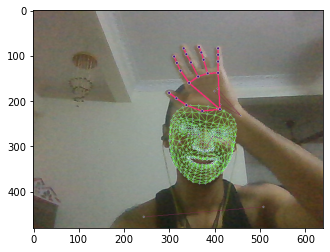

In [18]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [19]:
results.pose_landmarks

landmark {
  x: 0.5937191247940063
  y: 0.6423280835151672
  z: -0.9262162446975708
  visibility: 0.999927818775177
}
landmark {
  x: 0.6202038526535034
  y: 0.581235945224762
  z: -0.8574069738388062
  visibility: 0.9998629689216614
}
landmark {
  x: 0.6348940134048462
  y: 0.5845416188240051
  z: -0.8572399020195007
  visibility: 0.9998618364334106
}
landmark {
  x: 0.6501834988594055
  y: 0.5884067416191101
  z: -0.8568999171257019
  visibility: 0.9998310804367065
}
landmark {
  x: 0.5715843439102173
  y: 0.5723784565925598
  z: -0.8621259927749634
  visibility: 0.9998747706413269
}
landmark {
  x: 0.5525928735733032
  y: 0.5708995461463928
  z: -0.8614482879638672
  visibility: 0.9998677968978882
}
landmark {
  x: 0.5361257791519165
  y: 0.5706549286842346
  z: -0.8617606163024902
  visibility: 0.9998504519462585
}
landmark {
  x: 0.673128068447113
  y: 0.614885687828064
  z: -0.45002755522727966
  visibility: 0.9998890161514282
}
landmark {
  x: 0.5070801377296448
  y: 0.607344865

In [20]:
pose=[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [21]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [22]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [23]:
result_test = extract_keypoints(results)

In [24]:
result_test

array([ 0.59371912,  0.64232808, -0.92621624, ...,  0.        ,
        0.        ,  0.        ])

In [25]:
np.save('0',result_test)

In [26]:
np.load('0.npy')

array([ 0.59371912,  0.64232808, -0.92621624, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folder for Collection

In [27]:
# path for exported data, numy arrays
DATA_PATH = os.path.join('Generated_Data')

# Actions that we try to detect
actions = np.array(['hello','thanks',])

# Thrity videos worth of data
no_sequences = 30

# Videos are going to be  30 frames in length
sequence_length = 30

In [28]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass
    

# 5. Collect Keypoint Values for Training and Testing

In [30]:
cap = cv2.VideoCapture(0)

#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
        
                # Read feed
                ret,frame=cap.read()

                # Make detections
                image,results = mediapipe_detection(frame,holistic)
                print(results)

                #draw landmarks
                draw_styled_landmarks(image,results)
                
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {} '.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1,cv2.LINE_AA)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {} '.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1,cv2.LINE_AA)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action,str(sequence), str(frame_num))
                np.save(npy_path,keypoints)

                # show to screen
                cv2.imshow('OpneCV feed',image)
        
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# 6. Preprocessing Data and Create Labels and Features

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
label_map = {label:num for num, label in enumerate(actions)}

In [33]:
label_map

{'hello': 0, 'thanks': 1}

In [35]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [36]:
np.array(sequences).shape

(60, 30, 1662)

In [39]:
np.array(labels).shape

(60,)

In [40]:
x = np.array(sequences)

In [41]:
x.shape

(60, 30, 1662)

In [43]:
y = to_categorical(labels).astype(int)

In [44]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.05)

In [92]:
x_test.shape

(3, 30, 1662)

# 7. Build and Train LSTM Neural Network 

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [52]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [97]:
model = Sequential()
model.add(LSTM(64, return_sequences = True, activation = 'relu', input_shape = (30,1662)))
model.add(LSTM(128, return_sequences = True, activation = 'relu'))
model.add(LSTM(64, return_sequences = False, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))




In [63]:
res = [0.7,0.2,0.1]

In [99]:
actions[np.argmax(res)]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [100]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [101]:
model.fit(x_train,y_train,epochs = 2000, callbacks = [tb_callback])

Epoch 1/2000
2/2 [==============================] - 13s 2s/step - loss: 0.7882 - categorical_accuracy: 0.4370
Epoch 2/2000
2/2 [==============================] - 0s 158ms/step - loss: 2.6015 - categorical_accuracy: 0.4253
Epoch 3/2000
2/2 [==============================] - 0s 148ms/step - loss: 16.8846 - categorical_accuracy: 0.4837
Epoch 4/2000
2/2 [==============================] - 0s 130ms/step - loss: 11.0498 - categorical_accuracy: 0.4629
Epoch 5/2000
2/2 [==============================] - 0s 139ms/step - loss: 5.4589 - categorical_accuracy: 0.4499
Epoch 6/2000
2/2 [==============================] - 0s 125ms/step - loss: 2.0490 - categorical_accuracy: 0.5567
Epoch 7/2000
2/2 [==============================] - 0s 142ms/step - loss: 1.3755 - categorical_accuracy: 0.6515
Epoch 8/2000
2/2 [==============================] - 0s 168ms/step - loss: 2.1606 - categorical_accuracy: 0.4733
Epoch 9/2000
2/2 [==============================] - 0s 151ms/step - loss: 2.0588 - categorical_accuracy:

2/2 [==============================] - 0s 161ms/step - loss: 1.1973 - categorical_accuracy: 0.5046
Epoch 74/2000
2/2 [==============================] - 0s 125ms/step - loss: 0.9496 - categorical_accuracy: 0.5163
Epoch 75/2000
2/2 [==============================] - 0s 181ms/step - loss: 1.1074 - categorical_accuracy: 0.5163
Epoch 76/2000
2/2 [==============================] - 0s 122ms/step - loss: 0.6942 - categorical_accuracy: 0.6944
Epoch 77/2000
2/2 [==============================] - 0s 120ms/step - loss: 0.8560 - categorical_accuracy: 0.5071
Epoch 78/2000
2/2 [==============================] - 0s 157ms/step - loss: 0.9645 - categorical_accuracy: 0.5488
Epoch 79/2000
2/2 [==============================] - 0s 126ms/step - loss: 0.9549 - categorical_accuracy: 0.5033
Epoch 80/2000
2/2 [==============================] - 0s 153ms/step - loss: 0.6836 - categorical_accuracy: 0.5630
Epoch 81/2000
2/2 [==============================] - 0s 160ms/step - loss: 0.9653 - categorical_accuracy: 0.54

2/2 [==============================] - 0s 144ms/step - loss: 0.4676 - categorical_accuracy: 0.7100
Epoch 146/2000
2/2 [==============================] - 0s 139ms/step - loss: 0.4163 - categorical_accuracy: 0.7971
Epoch 147/2000
2/2 [==============================] - 0s 126ms/step - loss: 0.4623 - categorical_accuracy: 0.6996
Epoch 148/2000
2/2 [==============================] - 0s 142ms/step - loss: 0.4157 - categorical_accuracy: 0.8660
Epoch 149/2000
2/2 [==============================] - 0s 134ms/step - loss: 0.3977 - categorical_accuracy: 0.7763
Epoch 150/2000
2/2 [==============================] - 0s 134ms/step - loss: 0.4148 - categorical_accuracy: 0.8752
Epoch 151/2000
2/2 [==============================] - 0s 138ms/step - loss: 0.4132 - categorical_accuracy: 0.8414
Epoch 152/2000
2/2 [==============================] - 0s 150ms/step - loss: 0.4345 - categorical_accuracy: 0.7880
Epoch 153/2000
2/2 [==============================] - 0s 137ms/step - loss: 0.3986 - categorical_accura

Epoch 217/2000
2/2 [==============================] - 0s 133ms/step - loss: 0.6856 - categorical_accuracy: 0.8986
Epoch 218/2000
2/2 [==============================] - 0s 132ms/step - loss: 0.4044 - categorical_accuracy: 0.7997
Epoch 219/2000
2/2 [==============================] - 0s 153ms/step - loss: 0.5304 - categorical_accuracy: 0.7971
Epoch 220/2000
2/2 [==============================] - 0s 125ms/step - loss: 0.6518 - categorical_accuracy: 0.6996
Epoch 221/2000
2/2 [==============================] - 0s 143ms/step - loss: 0.4495 - categorical_accuracy: 0.8439
Epoch 222/2000
2/2 [==============================] - 0s 136ms/step - loss: 0.2523 - categorical_accuracy: 0.8973
Epoch 223/2000
2/2 [==============================] - 0s 141ms/step - loss: 0.2432 - categorical_accuracy: 0.9311
Epoch 224/2000
2/2 [==============================] - 0s 133ms/step - loss: 0.3001 - categorical_accuracy: 0.8882
Epoch 225/2000
2/2 [==============================] - 0s 130ms/step - loss: 0.2486 - cat

2/2 [==============================] - 0s 130ms/step - loss: 0.5644 - categorical_accuracy: 0.8297
Epoch 289/2000
2/2 [==============================] - 0s 128ms/step - loss: 0.2166 - categorical_accuracy: 0.9441
Epoch 290/2000
2/2 [==============================] - 0s 139ms/step - loss: 0.4743 - categorical_accuracy: 0.6489
Epoch 291/2000
2/2 [==============================] - 0s 122ms/step - loss: 0.3514 - categorical_accuracy: 0.8739
Epoch 292/2000
2/2 [==============================] - 0s 176ms/step - loss: 0.7000 - categorical_accuracy: 0.8088
Epoch 293/2000
2/2 [==============================] - 0s 141ms/step - loss: 0.2755 - categorical_accuracy: 0.8271
Epoch 294/2000
2/2 [==============================] - 0s 131ms/step - loss: 0.5439 - categorical_accuracy: 0.6787
Epoch 295/2000
2/2 [==============================] - 0s 137ms/step - loss: 0.4037 - categorical_accuracy: 0.9311
Epoch 296/2000
2/2 [==============================] - 0s 126ms/step - loss: 0.7502 - categorical_accura

Epoch 360/2000
2/2 [==============================] - 0s 130ms/step - loss: 0.0652 - categorical_accuracy: 0.9441
Epoch 361/2000
2/2 [==============================] - 0s 131ms/step - loss: 0.0812 - categorical_accuracy: 0.9766
Epoch 362/2000
2/2 [==============================] - 0s 123ms/step - loss: 0.0554 - categorical_accuracy: 0.9883
Epoch 363/2000
2/2 [==============================] - 0s 120ms/step - loss: 0.0783 - categorical_accuracy: 0.9545
Epoch 364/2000
2/2 [==============================] - 0s 123ms/step - loss: 0.0813 - categorical_accuracy: 0.9766
Epoch 365/2000
2/2 [==============================] - 0s 132ms/step - loss: 0.0823 - categorical_accuracy: 0.9766
Epoch 366/2000
2/2 [==============================] - 0s 123ms/step - loss: 0.0819 - categorical_accuracy: 0.9545
Epoch 367/2000
2/2 [==============================] - 0s 122ms/step - loss: 0.0727 - categorical_accuracy: 0.9766
Epoch 368/2000
2/2 [==============================] - 0s 138ms/step - loss: 0.0576 - cat

2/2 [==============================] - 0s 126ms/step - loss: 0.0845 - categorical_accuracy: 0.9441
Epoch 432/2000
2/2 [==============================] - 0s 140ms/step - loss: 0.0170 - categorical_accuracy: 0.9883
Epoch 433/2000
2/2 [==============================] - 0s 120ms/step - loss: 0.0260 - categorical_accuracy: 1.0000
Epoch 434/2000
2/2 [==============================] - 0s 124ms/step - loss: 0.0546 - categorical_accuracy: 0.9779
Epoch 435/2000
2/2 [==============================] - 0s 131ms/step - loss: 0.0362 - categorical_accuracy: 0.9883
Epoch 436/2000
2/2 [==============================] - 0s 125ms/step - loss: 0.0147 - categorical_accuracy: 1.0000
Epoch 437/2000
2/2 [==============================] - 0s 112ms/step - loss: 0.0494 - categorical_accuracy: 0.9779
Epoch 438/2000
2/2 [==============================] - 0s 141ms/step - loss: 0.0165 - categorical_accuracy: 1.0000
Epoch 439/2000
2/2 [==============================] - 0s 129ms/step - loss: 0.0240 - categorical_accura

Epoch 503/2000
2/2 [==============================] - 0s 141ms/step - loss: 0.0023 - categorical_accuracy: 1.0000
Epoch 504/2000
2/2 [==============================] - 0s 174ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 505/2000
2/2 [==============================] - 0s 138ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 506/2000
2/2 [==============================] - 0s 148ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 507/2000
2/2 [==============================] - 0s 136ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 508/2000
2/2 [==============================] - 0s 127ms/step - loss: 0.0023 - categorical_accuracy: 1.0000
Epoch 509/2000
2/2 [==============================] - 0s 126ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 510/2000
2/2 [==============================] - 0s 142ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 511/2000
2/2 [==============================] - 0s 146ms/step - loss: 0.0021 - cat

2/2 [==============================] - 0s 172ms/step - loss: 9.0219e-04 - categorical_accuracy: 1.0000
Epoch 574/2000
2/2 [==============================] - 0s 174ms/step - loss: 7.8174e-04 - categorical_accuracy: 1.0000
Epoch 575/2000
2/2 [==============================] - 0s 172ms/step - loss: 7.3373e-04 - categorical_accuracy: 1.0000
Epoch 576/2000
2/2 [==============================] - 0s 149ms/step - loss: 6.0065e-04 - categorical_accuracy: 1.0000
Epoch 577/2000
2/2 [==============================] - 0s 126ms/step - loss: 6.3352e-04 - categorical_accuracy: 1.0000
Epoch 578/2000
2/2 [==============================] - 0s 125ms/step - loss: 8.0622e-04 - categorical_accuracy: 1.0000
Epoch 579/2000
2/2 [==============================] - 0s 128ms/step - loss: 7.1024e-04 - categorical_accuracy: 1.0000
Epoch 580/2000
2/2 [==============================] - 0s 145ms/step - loss: 5.9679e-04 - categorical_accuracy: 1.0000
Epoch 581/2000
2/2 [==============================] - 0s 123ms/step - l

2/2 [==============================] - 0s 126ms/step - loss: 3.9652e-04 - categorical_accuracy: 1.0000
Epoch 643/2000
2/2 [==============================] - 0s 124ms/step - loss: 2.7882e-04 - categorical_accuracy: 1.0000
Epoch 644/2000
2/2 [==============================] - 0s 121ms/step - loss: 3.3168e-04 - categorical_accuracy: 1.0000
Epoch 645/2000
2/2 [==============================] - 0s 139ms/step - loss: 4.3982e-04 - categorical_accuracy: 1.0000
Epoch 646/2000
2/2 [==============================] - 0s 115ms/step - loss: 4.2148e-04 - categorical_accuracy: 1.0000
Epoch 647/2000
2/2 [==============================] - 0s 155ms/step - loss: 3.9994e-04 - categorical_accuracy: 1.0000
Epoch 648/2000
2/2 [==============================] - 0s 126ms/step - loss: 3.9564e-04 - categorical_accuracy: 1.0000
Epoch 649/2000
2/2 [==============================] - 0s 167ms/step - loss: 3.5568e-04 - categorical_accuracy: 1.0000
Epoch 650/2000
2/2 [==============================] - 0s 121ms/step - l

2/2 [==============================] - 0s 211ms/step - loss: 2.1718e-04 - categorical_accuracy: 1.0000
Epoch 712/2000
2/2 [==============================] - 0s 134ms/step - loss: 2.0467e-04 - categorical_accuracy: 1.0000
Epoch 713/2000
2/2 [==============================] - 0s 141ms/step - loss: 2.0146e-04 - categorical_accuracy: 1.0000
Epoch 714/2000
2/2 [==============================] - 0s 139ms/step - loss: 2.3996e-04 - categorical_accuracy: 1.0000
Epoch 715/2000
2/2 [==============================] - 0s 152ms/step - loss: 2.0024e-04 - categorical_accuracy: 1.0000
Epoch 716/2000
2/2 [==============================] - 0s 178ms/step - loss: 2.1354e-04 - categorical_accuracy: 1.0000
Epoch 717/2000
2/2 [==============================] - 0s 178ms/step - loss: 1.7288e-04 - categorical_accuracy: 1.0000
Epoch 718/2000
2/2 [==============================] - 0s 189ms/step - loss: 1.8949e-04 - categorical_accuracy: 1.00000s - loss: 1.8627e-04 - categorical_accuracy: 1.00
Epoch 719/2000
2/2 [=

2/2 [==============================] - 0s 159ms/step - loss: 1.3721e-04 - categorical_accuracy: 1.0000
Epoch 780/2000
2/2 [==============================] - 0s 157ms/step - loss: 1.4241e-04 - categorical_accuracy: 1.0000
Epoch 781/2000
2/2 [==============================] - 0s 140ms/step - loss: 1.2463e-04 - categorical_accuracy: 1.0000
Epoch 782/2000
2/2 [==============================] - 0s 185ms/step - loss: 1.5223e-04 - categorical_accuracy: 1.0000
Epoch 783/2000
2/2 [==============================] - 0s 189ms/step - loss: 8.8620e-05 - categorical_accuracy: 1.0000
Epoch 784/2000
2/2 [==============================] - 0s 159ms/step - loss: 1.3307e-04 - categorical_accuracy: 1.0000
Epoch 785/2000
2/2 [==============================] - 0s 135ms/step - loss: 1.0292e-04 - categorical_accuracy: 1.0000
Epoch 786/2000
2/2 [==============================] - 0s 182ms/step - loss: 1.3507e-04 - categorical_accuracy: 1.0000
Epoch 787/2000
2/2 [==============================] - 0s 182ms/step - l

2/2 [==============================] - 0s 179ms/step - loss: 36.3777 - categorical_accuracy: 0.5514
Epoch 850/2000
2/2 [==============================] - 0s 159ms/step - loss: 12.8105 - categorical_accuracy: 0.5605
Epoch 851/2000
2/2 [==============================] - 0s 118ms/step - loss: 104.2333 - categorical_accuracy: 0.5864
Epoch 852/2000
2/2 [==============================] - 0s 148ms/step - loss: 97.5018 - categorical_accuracy: 0.4708
Epoch 853/2000
2/2 [==============================] - 0s 172ms/step - loss: 164.4078 - categorical_accuracy: 0.4825
Epoch 854/2000
2/2 [==============================] - 0s 153ms/step - loss: 313.6296 - categorical_accuracy: 0.5071
Epoch 855/2000
2/2 [==============================] - 0s 134ms/step - loss: 350.2238 - categorical_accuracy: 0.5071
Epoch 856/2000
2/2 [==============================] - 0s 155ms/step - loss: 74.2242 - categorical_accuracy: 0.5722
Epoch 857/2000
2/2 [==============================] - 0s 128ms/step - loss: 69.4068 - categ

2/2 [==============================] - 0s 139ms/step - loss: 1.8018 - categorical_accuracy: 0.5722
Epoch 921/2000
2/2 [==============================] - 0s 131ms/step - loss: 1.9828 - categorical_accuracy: 0.4837
Epoch 922/2000
2/2 [==============================] - 0s 140ms/step - loss: 1.6001 - categorical_accuracy: 0.5384
Epoch 923/2000
2/2 [==============================] - 0s 122ms/step - loss: 1.5264 - categorical_accuracy: 0.5175
Epoch 924/2000
2/2 [==============================] - 0s 152ms/step - loss: 2.1358 - categorical_accuracy: 0.4825
Epoch 925/2000
2/2 [==============================] - 0s 153ms/step - loss: 1.0270 - categorical_accuracy: 0.6528
Epoch 926/2000
2/2 [==============================] - 0s 152ms/step - loss: 2.1519 - categorical_accuracy: 0.4265
Epoch 927/2000
2/2 [==============================] - 0s 150ms/step - loss: 0.9737 - categorical_accuracy: 0.5397
Epoch 928/2000
2/2 [==============================] - 0s 145ms/step - loss: 1.2221 - categorical_accura

Epoch 992/2000
2/2 [==============================] - 0s 142ms/step - loss: 0.8685 - categorical_accuracy: 0.4942
Epoch 993/2000
2/2 [==============================] - 0s 136ms/step - loss: 0.8240 - categorical_accuracy: 0.5501
Epoch 994/2000
2/2 [==============================] - 0s 137ms/step - loss: 0.9386 - categorical_accuracy: 0.5254
Epoch 995/2000
2/2 [==============================] - 0s 139ms/step - loss: 1.5325 - categorical_accuracy: 0.5292
Epoch 996/2000
2/2 [==============================] - 0s 148ms/step - loss: 1.1477 - categorical_accuracy: 0.4942
Epoch 997/2000
2/2 [==============================] - 0s 157ms/step - loss: 1.2362 - categorical_accuracy: 0.5188
Epoch 998/2000
2/2 [==============================] - 0s 139ms/step - loss: 0.9165 - categorical_accuracy: 0.5150
Epoch 999/2000
2/2 [==============================] - 0s 147ms/step - loss: 1.5032 - categorical_accuracy: 0.5292
Epoch 1000/2000
2/2 [==============================] - 0s 120ms/step - loss: 1.3017 - ca

2/2 [==============================] - 0s 140ms/step - loss: 1.6740 - categorical_accuracy: 0.5292
Epoch 1064/2000
2/2 [==============================] - 0s 143ms/step - loss: 1.2369 - categorical_accuracy: 0.4629
Epoch 1065/2000
2/2 [==============================] - 0s 132ms/step - loss: 0.9278 - categorical_accuracy: 0.5397
Epoch 1066/2000
2/2 [==============================] - 0s 147ms/step - loss: 0.9499 - categorical_accuracy: 0.4942
Epoch 1067/2000
2/2 [==============================] - 0s 134ms/step - loss: 0.9413 - categorical_accuracy: 0.5709
Epoch 1068/2000
2/2 [==============================] - 0s 138ms/step - loss: 1.6965 - categorical_accuracy: 0.4837
Epoch 1069/2000
2/2 [==============================] - 0s 142ms/step - loss: 1.5272 - categorical_accuracy: 0.5397
Epoch 1070/2000
2/2 [==============================] - 0s 119ms/step - loss: 1.1847 - categorical_accuracy: 0.5150
Epoch 1071/2000
2/2 [==============================] - 0s 136ms/step - loss: 1.2125 - categorica

2/2 [==============================] - 0s 139ms/step - loss: 1.2295 - categorical_accuracy: 0.5709
Epoch 1135/2000
2/2 [==============================] - 0s 137ms/step - loss: 1.0777 - categorical_accuracy: 0.5046
Epoch 1136/2000
2/2 [==============================] - 0s 157ms/step - loss: 0.9101 - categorical_accuracy: 0.5501
Epoch 1137/2000
2/2 [==============================] - 0s 138ms/step - loss: 0.8273 - categorical_accuracy: 0.4942
Epoch 1138/2000
2/2 [==============================] - 0s 139ms/step - loss: 0.8203 - categorical_accuracy: 0.5397
Epoch 1139/2000
2/2 [==============================] - 0s 148ms/step - loss: 0.8199 - categorical_accuracy: 0.4837
Epoch 1140/2000
2/2 [==============================] - 0s 139ms/step - loss: 0.7783 - categorical_accuracy: 0.5046
Epoch 1141/2000
2/2 [==============================] - 0s 155ms/step - loss: 0.6778 - categorical_accuracy: 0.5254
Epoch 1142/2000
2/2 [==============================] - 0s 130ms/step - loss: 1.0293 - categorica

2/2 [==============================] - 0s 143ms/step - loss: 0.7761 - categorical_accuracy: 0.5709
Epoch 1206/2000
2/2 [==============================] - 0s 149ms/step - loss: 1.2372 - categorical_accuracy: 0.4629
Epoch 1207/2000
2/2 [==============================] - 0s 121ms/step - loss: 0.8551 - categorical_accuracy: 0.5397
Epoch 1208/2000
2/2 [==============================] - 0s 174ms/step - loss: 0.8316 - categorical_accuracy: 0.5188
Epoch 1209/2000
2/2 [==============================] - 0s 162ms/step - loss: 0.7326 - categorical_accuracy: 0.5163
Epoch 1210/2000
2/2 [==============================] - 0s 160ms/step - loss: 0.8403 - categorical_accuracy: 0.4161
Epoch 1211/2000
2/2 [==============================] - 0s 181ms/step - loss: 0.7189 - categorical_accuracy: 0.4837
Epoch 1212/2000
2/2 [==============================] - 0s 127ms/step - loss: 0.7382 - categorical_accuracy: 0.4370
Epoch 1213/2000
2/2 [==============================] - 0s 223ms/step - loss: 0.6855 - categorica

2/2 [==============================] - 0s 144ms/step - loss: 0.6534 - categorical_accuracy: 0.5709
Epoch 1276/2000
2/2 [==============================] - 0s 185ms/step - loss: 0.7261 - categorical_accuracy: 0.5709
Epoch 1277/2000
2/2 [==============================] - 0s 140ms/step - loss: 0.9705 - categorical_accuracy: 0.4942
Epoch 1278/2000
2/2 [==============================] - 0s 132ms/step - loss: 1.0334 - categorical_accuracy: 0.5709
Epoch 1279/2000
2/2 [==============================] - 0s 145ms/step - loss: 1.4431 - categorical_accuracy: 0.5358
Epoch 1280/2000
2/2 [==============================] - 0s 142ms/step - loss: 1.1913 - categorical_accuracy: 0.5709
Epoch 1281/2000
2/2 [==============================] - 0s 140ms/step - loss: 1.1567 - categorical_accuracy: 0.5163
Epoch 1282/2000
2/2 [==============================] - 0s 163ms/step - loss: 1.8666 - categorical_accuracy: 0.4278
Epoch 1283/2000
2/2 [==============================] - 0s 136ms/step - loss: 1.1994 - categorica

2/2 [==============================] - 0s 139ms/step - loss: 1.1309 - categorical_accuracy: 0.4629
Epoch 1347/2000
2/2 [==============================] - 0s 145ms/step - loss: 0.7551 - categorical_accuracy: 0.6566
Epoch 1348/2000
2/2 [==============================] - 0s 163ms/step - loss: 0.6767 - categorical_accuracy: 0.5150
Epoch 1349/2000
2/2 [==============================] - 0s 146ms/step - loss: 0.9838 - categorical_accuracy: 0.5917
Epoch 1350/2000
2/2 [==============================] - 0s 132ms/step - loss: 1.6828 - categorical_accuracy: 0.5150
Epoch 1351/2000
2/2 [==============================] - 0s 136ms/step - loss: 1.1462 - categorical_accuracy: 0.7153
Epoch 1352/2000
2/2 [==============================] - 0s 132ms/step - loss: 1.4100 - categorical_accuracy: 0.5384
Epoch 1353/2000
2/2 [==============================] - 0s 125ms/step - loss: 1.3861 - categorical_accuracy: 0.4850
Epoch 1354/2000
2/2 [==============================] - 0s 134ms/step - loss: 0.9857 - categorica

2/2 [==============================] - 0s 148ms/step - loss: 0.7296 - categorical_accuracy: 0.4825
Epoch 1418/2000
2/2 [==============================] - 0s 144ms/step - loss: 0.6119 - categorical_accuracy: 0.6840
Epoch 1419/2000
2/2 [==============================] - 0s 144ms/step - loss: 0.6300 - categorical_accuracy: 0.5826
Epoch 1420/2000
2/2 [==============================] - 0s 143ms/step - loss: 0.8009 - categorical_accuracy: 0.5254
Epoch 1421/2000
2/2 [==============================] - 0s 145ms/step - loss: 1.3403 - categorical_accuracy: 0.5501
Epoch 1422/2000
2/2 [==============================] - 0s 140ms/step - loss: 0.9917 - categorical_accuracy: 0.4837
Epoch 1423/2000
2/2 [==============================] - 0s 143ms/step - loss: 0.7350 - categorical_accuracy: 0.5292
Epoch 1424/2000
2/2 [==============================] - 0s 148ms/step - loss: 0.6423 - categorical_accuracy: 0.4850
Epoch 1425/2000
2/2 [==============================] - 0s 144ms/step - loss: 0.6287 - categorica

2/2 [==============================] - 0s 130ms/step - loss: 0.6138 - categorical_accuracy: 0.6294
Epoch 1489/2000
2/2 [==============================] - 0s 134ms/step - loss: 0.6135 - categorical_accuracy: 0.5618
Epoch 1490/2000
2/2 [==============================] - 0s 151ms/step - loss: 0.6690 - categorical_accuracy: 0.4929
Epoch 1491/2000
2/2 [==============================] - 0s 123ms/step - loss: 0.6823 - categorical_accuracy: 0.5605
Epoch 1492/2000
2/2 [==============================] - 0s 146ms/step - loss: 0.8103 - categorical_accuracy: 0.4942
Epoch 1493/2000
2/2 [==============================] - 0s 129ms/step - loss: 0.9469 - categorical_accuracy: 0.5292
Epoch 1494/2000
2/2 [==============================] - 0s 141ms/step - loss: 0.7959 - categorical_accuracy: 0.5669
Epoch 1495/2000
2/2 [==============================] - 0s 122ms/step - loss: 0.6587 - categorical_accuracy: 0.6553
Epoch 1496/2000
2/2 [==============================] - 0s 142ms/step - loss: 0.7778 - categorica

2/2 [==============================] - 0s 132ms/step - loss: 1.0021 - categorical_accuracy: 0.6815
Epoch 1560/2000
2/2 [==============================] - 0s 143ms/step - loss: 0.8507 - categorical_accuracy: 0.5839
Epoch 1561/2000
2/2 [==============================] - 0s 135ms/step - loss: 1.5604 - categorical_accuracy: 0.4278
Epoch 1562/2000
2/2 [==============================] - 0s 140ms/step - loss: 0.8575 - categorical_accuracy: 0.5956
Epoch 1563/2000
2/2 [==============================] - 0s 138ms/step - loss: 1.1395 - categorical_accuracy: 0.4733
Epoch 1564/2000
2/2 [==============================] - 0s 145ms/step - loss: 0.8863 - categorical_accuracy: 0.4825
Epoch 1565/2000
2/2 [==============================] - 0s 146ms/step - loss: 0.7739 - categorical_accuracy: 0.4382
Epoch 1566/2000
2/2 [==============================] - 0s 133ms/step - loss: 0.7774 - categorical_accuracy: 0.5254
Epoch 1567/2000
2/2 [==============================] - 0s 134ms/step - loss: 0.8093 - categorica

2/2 [==============================] - 0s 139ms/step - loss: 1.0762 - categorical_accuracy: 0.5501
Epoch 1631/2000
2/2 [==============================] - 0s 136ms/step - loss: 0.7939 - categorical_accuracy: 0.4733
Epoch 1632/2000
2/2 [==============================] - 0s 127ms/step - loss: 0.7793 - categorical_accuracy: 0.4720
Epoch 1633/2000
2/2 [==============================] - 0s 188ms/step - loss: 0.7716 - categorical_accuracy: 0.5163
Epoch 1634/2000
2/2 [==============================] - 0s 182ms/step - loss: 0.8573 - categorical_accuracy: 0.4499
Epoch 1635/2000
2/2 [==============================] - 0s 202ms/step - loss: 0.9674 - categorical_accuracy: 0.4486
Epoch 1636/2000
2/2 [==============================] - 0s 198ms/step - loss: 1.1449 - categorical_accuracy: 0.5046
Epoch 1637/2000
2/2 [==============================] - 0s 194ms/step - loss: 1.2142 - categorical_accuracy: 0.5384
Epoch 1638/2000
2/2 [==============================] - 0s 180ms/step - loss: 0.9775 - categorica

2/2 [==============================] - 0s 151ms/step - loss: 0.8113 - categorical_accuracy: 0.6815
Epoch 1701/2000
2/2 [==============================] - 0s 134ms/step - loss: 0.6908 - categorical_accuracy: 0.5722
Epoch 1702/2000
2/2 [==============================] - 0s 138ms/step - loss: 0.7665 - categorical_accuracy: 0.5175
Epoch 1703/2000
2/2 [==============================] - 0s 139ms/step - loss: 0.8422 - categorical_accuracy: 0.5760
Epoch 1704/2000
2/2 [==============================] - 0s 137ms/step - loss: 0.7354 - categorical_accuracy: 0.4837
Epoch 1705/2000
2/2 [==============================] - 0s 137ms/step - loss: 0.6834 - categorical_accuracy: 0.5292
Epoch 1706/2000
2/2 [==============================] - 0s 133ms/step - loss: 0.6534 - categorical_accuracy: 0.6594
Epoch 1707/2000
2/2 [==============================] - 0s 156ms/step - loss: 0.6528 - categorical_accuracy: 0.5292
Epoch 1708/2000
2/2 [==============================] - 0s 130ms/step - loss: 0.6411 - categorica

2/2 [==============================] - 0s 171ms/step - loss: 0.6279 - categorical_accuracy: 0.7049
Epoch 1772/2000
2/2 [==============================] - 0s 167ms/step - loss: 0.5503 - categorical_accuracy: 0.6294
Epoch 1773/2000
2/2 [==============================] - 0s 146ms/step - loss: 0.6682 - categorical_accuracy: 0.5422
Epoch 1774/2000
2/2 [==============================] - 0s 207ms/step - loss: 0.6087 - categorical_accuracy: 0.6319
Epoch 1775/2000
2/2 [==============================] - 0s 149ms/step - loss: 0.6103 - categorical_accuracy: 0.5760
Epoch 1776/2000
2/2 [==============================] - 0s 161ms/step - loss: 0.6218 - categorical_accuracy: 0.5709
Epoch 1777/2000
2/2 [==============================] - 0s 174ms/step - loss: 0.7182 - categorical_accuracy: 0.4942
Epoch 1778/2000
2/2 [==============================] - 0s 145ms/step - loss: 0.6298 - categorical_accuracy: 0.5292
Epoch 1779/2000
2/2 [==============================] - 0s 121ms/step - loss: 0.5840 - categorica

2/2 [==============================] - 0s 152ms/step - loss: 0.6218 - categorical_accuracy: 0.5280
Epoch 1842/2000
2/2 [==============================] - 0s 151ms/step - loss: 0.6505 - categorical_accuracy: 0.5930
Epoch 1843/2000
2/2 [==============================] - 0s 135ms/step - loss: 0.6639 - categorical_accuracy: 0.4837
Epoch 1844/2000
2/2 [==============================] - 0s 126ms/step - loss: 0.7581 - categorical_accuracy: 0.6034
Epoch 1845/2000
2/2 [==============================] - 0s 130ms/step - loss: 0.7498 - categorical_accuracy: 0.5046
Epoch 1846/2000
2/2 [==============================] - 0s 183ms/step - loss: 0.5964 - categorical_accuracy: 0.6294
Epoch 1847/2000
2/2 [==============================] - 0s 153ms/step - loss: 0.6719 - categorical_accuracy: 0.5813
Epoch 1848/2000
2/2 [==============================] - 0s 175ms/step - loss: 0.9751 - categorical_accuracy: 0.4942
Epoch 1849/2000
2/2 [==============================] - 0s 186ms/step - loss: 0.8223 - categorica

2/2 [==============================] - 0s 165ms/step - loss: 0.5860 - categorical_accuracy: 0.8076
Epoch 1913/2000
2/2 [==============================] - 0s 141ms/step - loss: 0.6101 - categorical_accuracy: 0.6332
Epoch 1914/2000
2/2 [==============================] - 0s 127ms/step - loss: 0.5973 - categorical_accuracy: 0.7425
Epoch 1915/2000
2/2 [==============================] - 0s 130ms/step - loss: 0.5993 - categorical_accuracy: 0.6372
Epoch 1916/2000
2/2 [==============================] - 0s 128ms/step - loss: 0.6650 - categorical_accuracy: 0.5046
Epoch 1917/2000
2/2 [==============================] - 0s 242ms/step - loss: 0.6881 - categorical_accuracy: 0.5188
Epoch 1918/2000
2/2 [==============================] - 0s 138ms/step - loss: 0.6297 - categorical_accuracy: 0.7478
Epoch 1919/2000
2/2 [==============================] - 0s 173ms/step - loss: 0.7032 - categorical_accuracy: 0.7257
Epoch 1920/2000
2/2 [==============================] - 0s 136ms/step - loss: 0.6273 - categorica

2/2 [==============================] - 0s 131ms/step - loss: 0.5836 - categorical_accuracy: 0.7867
Epoch 1984/2000
2/2 [==============================] - 0s 123ms/step - loss: 0.6643 - categorical_accuracy: 0.5605
Epoch 1985/2000
2/2 [==============================] - 0s 124ms/step - loss: 0.7710 - categorical_accuracy: 0.5046
Epoch 1986/2000
2/2 [==============================] - 0s 126ms/step - loss: 0.7868 - categorical_accuracy: 0.5709
Epoch 1987/2000
2/2 [==============================] - 0s 129ms/step - loss: 0.8155 - categorical_accuracy: 0.5592
Epoch 1988/2000
2/2 [==============================] - 0s 124ms/step - loss: 0.9156 - categorical_accuracy: 0.4161
Epoch 1989/2000
2/2 [==============================] - 0s 151ms/step - loss: 0.7120 - categorical_accuracy: 0.6177
Epoch 1990/2000
2/2 [==============================] - 0s 125ms/step - loss: 1.0016 - categorical_accuracy: 0.5150
Epoch 1991/2000
2/2 [==============================] - 0s 125ms/step - loss: 1.1598 - categorica

In [102]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 596,642
Trainable params: 596,642
Non-trainable params: 0
________________________________________________

# Make Predictions

In [103]:
res = model.predict(x_test)

In [106]:
actions[np.argmax(res[0])]

'thanks'

In [111]:
actions[np.argmax(y_test[0])]

'hello'

In [115]:
y_test

array([[1, 0],
       [1, 0],
       [1, 0]])

# Save Weights

In [94]:
model.save('action.h5')

In [96]:
del model

NameError: name 'model' is not defined

# 10. Evaluation using  Confusion Matrix and Accuracy